# Proyek Analisis Data: Air Quality
- **Nama:** Wahyu Ardiantito. S
- **Email:** ardiantitowahyu@gmail.com
- **ID Dicoding:** ardiantito

## Menentukan pertanyaan bisnis

- Pada jam berapa rata-rata nilai pm2.5 tertinggi
- Stasiun mana yang memiliki rata-rata pm2.5 terendah
- Stasiun manakah yang paling sering mengalami hujan

## Import Semua Packages/Library yang Digunakan

In [29]:
import numpy as np #Digunakan untuk operasi matematis
import pandas as pd #Digunakan untuk tabulasi dan manipulasi data
import matplotlib.pyplot as plt #Digunakan untuk membuat plot (Visualisasi Data)
import glob #Digunakan untuk membaca direktori

## Data Wrangling

### Gathering Data

In [30]:
#Memaca keseluruhan file csv pada direktori dataset untuk kemudian disimpan di variabel 'data'
file_pattern = 'PRSA_Data_*_20130301-20170228.csv'
file_paths = glob.glob('dataset/' + file_pattern)

stations = [path.split('_')[2].lower() for path in file_paths]

data = {}
for station, path in zip(stations, file_paths):
    data[station] = pd.read_csv(path)

In [31]:
#Membuat dataframe dari variabel "data"
aotizhongxin_df = data['aotizhongxin']
changping_df = data['changping']
dingling_df = data['dingling']
dongsi_df = data['dongsi']
guanyuan_df = data['guanyuan']
gucheng_df = data['gucheng']
huairou_df = data['huairou'] 
nongzhanguan_df = data['nongzhanguan']
shunyi_df = data['shunyi']
tiantan_df = data['tiantan']
wanliu_df = data['wanliu']
wanshouxigong_df = data['wanshouxigong']

In [32]:
# membuat df gabungan
df = pd.concat([aotizhongxin_df,
                    changping_df,
                    dingling_df,
                    dongsi_df,
                    guanyuan_df,
                    gucheng_df,
                    huairou_df,
                    nongzhanguan_df,
                    shunyi_df, 
                    tiantan_df,
                    wanliu_df,
                    wanshouxigong_df], ignore_index=True)

In [33]:
#Menampilkan 5 data terbawah
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [34]:
#Memeriksa jumlah baris data
len(df)

420768

Dapat dilihat jumlah index dari 5 data terbawah sama dengan len(df) maka dapat dipastikan bahwa seluruh dataset sudah berhasil digabungkan

### Assessing Data

In [35]:
#Memeriksa type data untuk tiap-tiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [36]:
#Memeriksa missing values untuk tiap variabel
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Dari hasil diatas ternyata banyak ditemukan data yang hilang. Oleh karena itu pada tahap berikutnya dilakukan imputasi untuk nilai yang hilang menggunakan nilai mean.

In [37]:
#Memeriksa adanya duplikasi
df.duplicated().sum()

0

Tidak ditemukan adanya duplikasi data menghapus kolom No pada dataframe

### Cleaning Data

In [38]:
#Menghapus variable No.
df.drop(labels='No', axis=1, inplace=True)

In [39]:
#Menghapus variable wd
df.drop(labels='wd', axis=1, inplace=True)

In [40]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin


In [41]:
# mengganti kolom 'year','month','day' kedalam bentuk datetime
datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.insert(loc=1, column='time', value=datetime)

In [42]:
df.head()

,year,time,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,2013,2013-03-01 00:00:00,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin
1,2013,2013-03-01 01:00:00,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin
2,2013,2013-03-01 02:00:00,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin
3,2013,2013-03-01 03:00:00,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin
4,2013,2013-03-01 04:00:00,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin


In [43]:
#Menghapus nilai yang kosong
df.dropna(inplace=True)

In [44]:
df.isna().sum()

year       0
time       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64

In [45]:
df = df.rename(columns={'PM2.5': 'PM25'})

## Exploratory Data Analysis (EDA)

### Explore ...

In [46]:
#Melihat statistik deskriptif
df.describe()

,year,time,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,383585.000000,383585,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000
mean,2014.719288,2015-03-20 18:35:58.779931136,6.476617,15.715286,11.572379,79.523931,104.643039,15.622388,50.625569,1231.862104,57.241318,13.493708,1010.828913,2.414531,0.064898,1.732421
min,2013.000000,2013-03-01 00:00:00,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,2014.000000,2014-04-06 13:00:00,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.000000,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,2015.000000,2015-03-27 16:00:00,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,2.900000,0.000000,1.400000
75%,2016.000000,2016-03-11 23:00:00,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,2017-02-28 23:00:00,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,1.161406,NaN,3.451968,8.801871,6.939440,80.205852,91.389334,21.290076,35.081258,1158.872753,56.675282,11.426799,10.451198,13.790993,0.822480,1.242827


In [47]:
#Melihat banyaknya stasiun
df['station'].nunique()

12

In [48]:
#Melihat banyak data untuk tiap stasiun
df['station'].value_counts()

station
Nongzhanguan     33176
Tiantan          32907
Wanshouxigong    32829
Changping        32774
Gucheng          32615
Guanyuan         32328
Huairou          31955
Aotizhongxin     31876
Dingling         31399
Wanliu           30737
Shunyi           30587
Dongsi           30402
Name: count, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa rata-rata nilai pm2.5 tertinggi

In [49]:
pm25_hourly = df.groupby('hour')['PM25'].mean()

In [50]:
pm25_hourly

hour
0     87.098788
1     85.817982
2     83.306339
3     81.259181
4     78.894473
5     75.946626
6     73.917752
7     73.032900
8     74.238014
9     75.767114
10    76.950183
11    77.408243
12    76.682395
13    76.373777
14    75.346470
15    74.812805
16    74.288303
17    75.636056
18    77.930102
19    81.919436
20    86.280369
21    88.078582
22    88.447249
23    88.338368
Name: PM25, dtype: float64

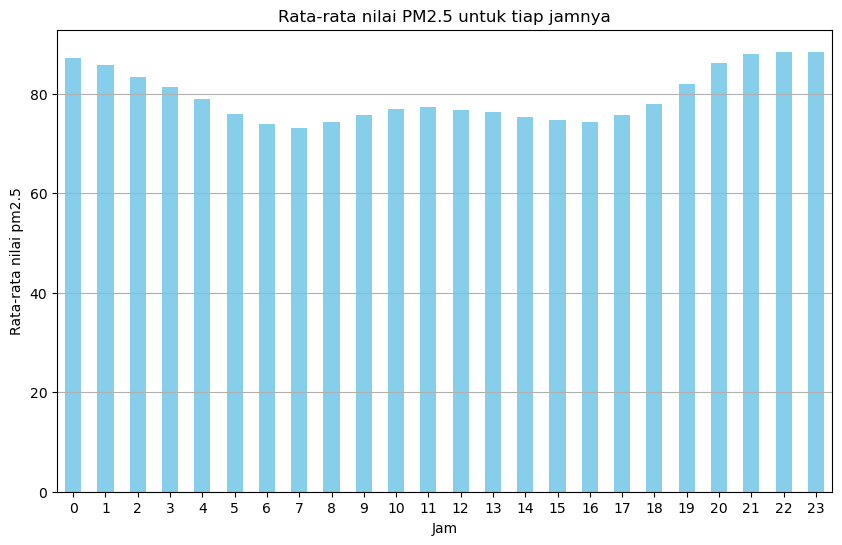

In [51]:
plt.figure(figsize=(10, 6))
pm25_hourly.plot(kind='bar', color='skyblue')
plt.title('Rata-rata nilai PM2.5 untuk tiap jamnya')
plt.xlabel('Jam')
plt.ylabel('Rata-rata nilai pm2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Hasil plot pada gambar diatas menunjukkan bahwa nilai rata-rata nilai pm2.5 tertinggi ada pada pukul 22:00, 23:00, dan pukul 0:00. selanjutnya untuk waktu dengan nilai pm2.5 paling sedikit adalah pukul 7:00. Nilai PM2.5 merupakan indikator yang menandakan kebersihan udara dari partikel partikel kecil yang kemungkinan tidak dapat disaring oleh sistem pernapasan manusia sehingga memiliki dampak yang cukup berbahaya.

### Pertanyaan 2: Stasiun mana yang memiliki rata-rata pm2.5 terendah

In [52]:
pm25_station = df.groupby('station')['PM25'].mean()
pm25_station

station
Aotizhongxin     81.883436
Changping        70.423482
Dingling         66.616609
Dongsi           84.980103
Guanyuan         83.122160
Gucheng          83.949539
Huairou          70.435550
Nongzhanguan     84.746745
Shunyi           79.960686
Tiantan          81.767192
Wanliu           81.990923
Wanshouxigong    84.273432
Name: PM25, dtype: float64

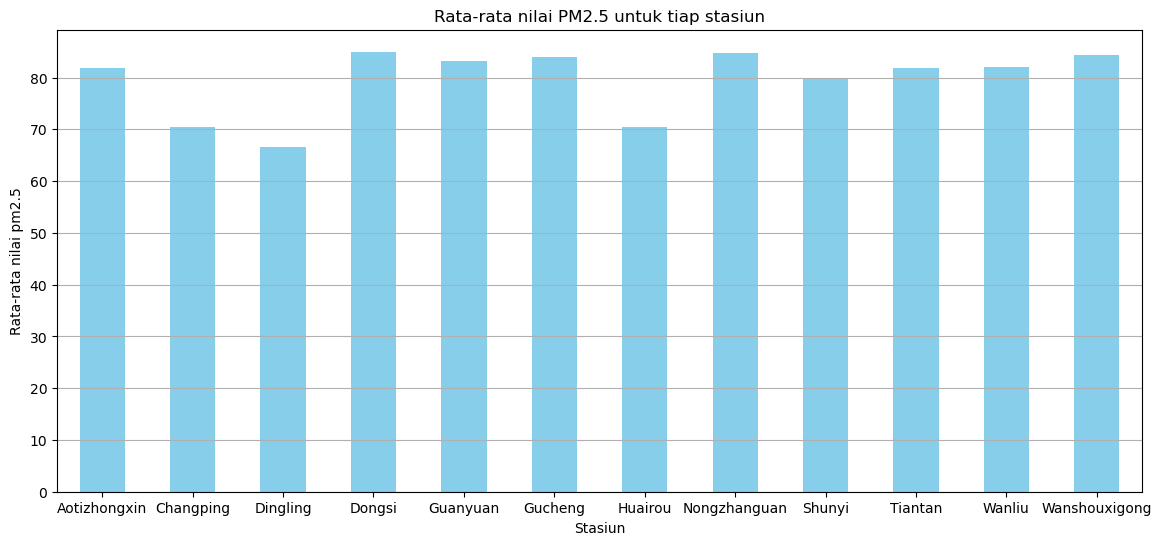

In [53]:
plt.figure(figsize=(14, 6))
pm25_station.plot(kind='bar', color='skyblue')
plt.title('Rata-rata nilai PM2.5 untuk tiap stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata nilai pm2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Plot diatas menunjukkan bahwa stasiun dengan rata-rata nilai PM2.5 paling rendah adalah stasiun Dingling. Sedangkan stasiun dengan dengan rata-rata nilai pm2.5 tertinggi adalah Dongsi. Oleh karena itu dapat dikatakan kualitas udara di daerah stasiun dongsi merupakan yang terbaik diantara daerah stasiun lainya.

### Pertanyaan 3: Stasiun manakah yang paling sering mengalami hujan

In [54]:
rainy_station = df.groupby('station')['RAIN'].mean()
rainy_station

station
Aotizhongxin     0.068108
Changping        0.060844
Dingling         0.062496
Dongsi           0.061443
Guanyuan         0.069240
Gucheng          0.065945
Huairou          0.066847
Nongzhanguan     0.066771
Shunyi           0.054566
Tiantan          0.065457
Wanliu           0.074448
Wanshouxigong    0.062347
Name: RAIN, dtype: float64

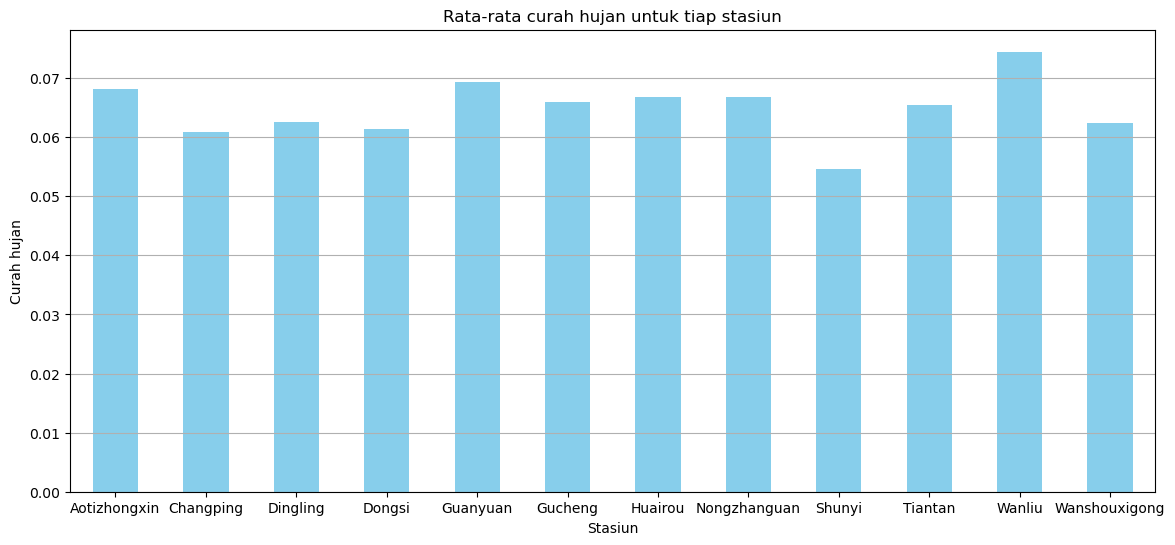

In [55]:
plt.figure(figsize=(14, 6))
rainy_station.plot(kind='bar', color='skyblue')
plt.title('Rata-rata curah hujan untuk tiap stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Curah hujan')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Hasil visualisasi diatas menunjukkan bahwa daerah stasiun wanliu merupakan daerah yang paling sering mengalamai hujan.

## Conclusion

- Conclution pertanyaan 1: Kesimpulan yang dapat diambil dari pertanyaan pertama adalah waktu dengan nilai pm2.5 yang paling tinggi adalah saat malam menjelang dini hari yaitu tepatnya pada pukul 22:00, 23:00, dan 0:00. Pada waktu ini didapatkan nilai pm2.5 yang lebih tinggi dibandingkan waktu lainya sehingga penggunaan masker disarankan untuk menjaga kesehatan mengingat indikator pm2.5 merupakan indikator konsentrasi partikel kecil yang tidak dapat disaring oleh sistem pernapasan manusia sehingga mempengaruhi dampak yang serius terhadapa kesehatan.
- Conclution pertanyaan 2: Kesimpulan dari pertanyaan kedua adalah stasiun dengan rata-rata pm2.5 terendah berada di Dingling. Oleh sebab itu dapat diambil kesimpulan bahwa stasiun ini merupakan stasiun dengan kualitas udara yang paling bersih dibandingkan dengan stasiun lainya, sementara stasiun Dongsi memiliki kualitas udara yang paling buruk diantara stasiun lainya.
- Conclution pertanyaan 3: Kesimpulan dari pertanyaan ketiga adalah daerah stasiun wanliu merupakan daerah dengan rata-rata curah hujan tertinggi. Hal ini menandakan daerah ini yang paling sering mengalami hujan dibandingkan dengan daerah-daerah stasiun lainya.

In [56]:
df.to_csv("all_data.csv", index=False)

In [28]:
#!pip freeze > requirements.txt